# Discovering DBSCAN

Beata Baczynska

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd "/content/drive/My Drive/Colab Notebooks/Omdena"

/content/drive/My Drive/Colab Notebooks/Omdena


In [0]:
df = pd.read_excel("Master_1068_18Apr.xlsx")

In [5]:
df.columns

Index(['SID', 'NAME', 'ISO', 'YEAR_MIN', 'BASIN', 'SUBBASIN',
       'SUBBASIN EDITED', 'NATURE', 'TRACK_TYPE', 'ISO_TIME', 'COORDS',
       'TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS', 'USA_SSHS', 'USA_SSHS EDITED',
       'WIND_CALC_MEAN (v_land_kn to be used)', 'PRES_CALC_MEAN',
       'STORM_SPD_MEAN', 'STORM_DR_MEAN', 'V_LAND_KN', '34KN_POP',
       '34KN_ASSETS', '64KN_POP', '64KN_ASSETS', '96KN_POP', '96KN_ASSETS',
       'CPI', 'TOTAL_DAMAGE_(000$)', 'Total Affected]'],
      dtype='object')

In [92]:
# choosing some numeric features
df = df[['TOTAL_HRS', 'PRES_CALC_MEAN','STORM_SPD_MEAN', 'Total Affected]']]
df

,TOTAL_HRS,PRES_CALC_MEAN,STORM_SPD_MEAN,Total Affected]
0,0,1000.333333,19.000000,194046
1,6,974.833333,23.000000,642117
2,15,974.500000,15.500000,20200
3,15,979.549020,3.000000,60000
4,3,980.600000,10.800000,103
...,...,...,...,...
1063,21,974.083333,9.384615,600000
1064,12,986.222222,21.500000,20
1065,12,982.187500,8.250000,100000
1066,21,965.214286,8.571429,360278


In [0]:
#Dropping nan values
df.dropna(inplace = True)

# Using DBSCAN algorithm for only one feature

In [94]:
X = df[['STORM_SPD_MEAN', 'Total Affected]']]
X

,STORM_SPD_MEAN,Total Affected]
0,19.000000,194046
1,23.000000,642117
2,15.500000,20200
3,3.000000,60000
4,10.800000,103
...,...,...
1063,9.384615,600000
1064,21.500000,20
1065,8.250000,100000
1066,8.571429,360278


In [95]:
df['Total Affected]'].max() - df['Total Affected]'].min()

29621998

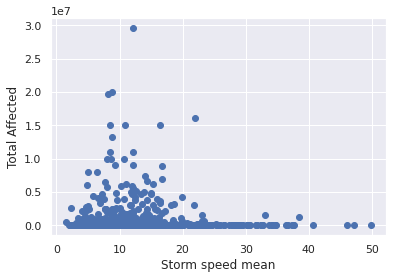

In [96]:
plt.scatter(df[['STORM_SPD_MEAN']], df[['Total Affected]']])
plt.xlabel("Storm speed mean")
plt.ylabel("Total Affected")
plt.show()

In [97]:
m = DBSCAN(eps=10000, min_samples=10)
m.fit(X)

DBSCAN(algorithm='auto', eps=10000, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [98]:
# number of clusters
clusters = m.labels_
len(np.unique(clusters))

8

In [0]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

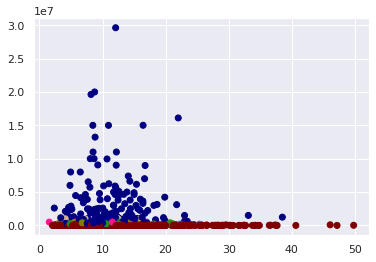

In [100]:
plt.scatter(X['STORM_SPD_MEAN'], X['Total Affected]'], c=vectorizer(clusters))

# Doing DBSCAN considering: TOTAL_HRS, 	PRES_CALC_MEAN, 	STORM_SPD_MEAN columns

In [102]:
X = df[['TOTAL_HRS', 'PRES_CALC_MEAN','STORM_SPD_MEAN', 'Total Affected]']]
X

,TOTAL_HRS,PRES_CALC_MEAN,STORM_SPD_MEAN,Total Affected]
0,0,1000.333333,19.000000,194046
1,6,974.833333,23.000000,642117
2,15,974.500000,15.500000,20200
3,15,979.549020,3.000000,60000
4,3,980.600000,10.800000,103
...,...,...,...,...
1063,21,974.083333,9.384615,600000
1064,12,986.222222,21.500000,20
1065,12,982.187500,8.250000,100000
1066,21,965.214286,8.571429,360278


In [103]:
X['PRES_CALC_MEAN'].max() - X['PRES_CALC_MEAN'].min()

1013.0

In [104]:
X['STORM_SPD_MEAN'].max() - X['STORM_SPD_MEAN'].min()

48.23478260869566

In [105]:
X['TOTAL_HRS'].max() - X['TOTAL_HRS'].min()

23

In [107]:
m = DBSCAN(eps=10000, min_samples=4)
m.fit(X)

DBSCAN(algorithm='auto', eps=10000, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [108]:
# number of clusters
clusters = m.labels_
len(np.unique(clusters))

16

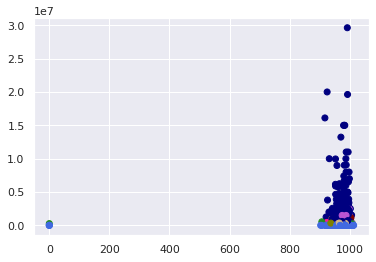

In [109]:
plt.scatter(X['PRES_CALC_MEAN'], df['Total Affected]'], c=vectorizer(clusters))

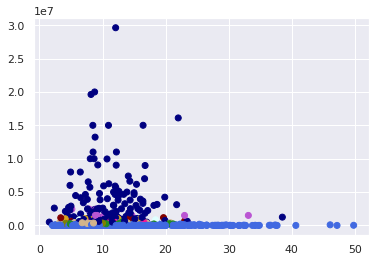

In [110]:
plt.scatter(X['STORM_SPD_MEAN'], df['Total Affected]'], c=vectorizer(clusters))

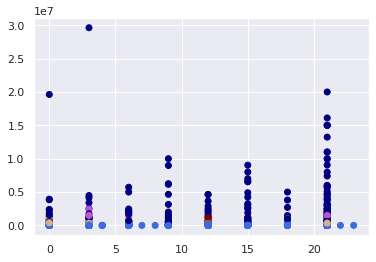

In [111]:
plt.scatter(X['TOTAL_HRS'], df['Total Affected]'], c=vectorizer(clusters))

Because is seems like only number of total affected matter, I've tried to normalize all values to treat them fairly

# With normalization, considering the same columns

In [113]:
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3
0,0.000000,0.987496,0.361457,6.550672e-03
1,0.260870,0.962323,0.444384,2.167696e-02
2,0.652174,0.961994,0.288895,6.818581e-04
3,0.652174,0.966978,0.029746,2.025454e-03
4,0.130435,0.968016,0.191455,3.409628e-06
...,...,...,...,...
1063,0.913043,0.961583,0.162111,2.025515e-02
1064,0.521739,0.973566,0.413286,6.076565e-07
1065,0.521739,0.969583,0.138588,3.375802e-03
1066,0.913043,0.952828,0.145252,1.216245e-02


In [124]:
# checking if normalization finised well
X[0].max() - X[0].min(), X[1].max() - X[1].min(), X[2].max() - X[2].min(), X[3].max() - X[3].min()

(1.0, 0.9999999999999999, 1.0000000000000002, 1.0)

In [118]:
m = DBSCAN(eps=0.1, min_samples=10)
m.fit(X)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [120]:
clusters = m.labels_
len(np.unique(clusters))

7

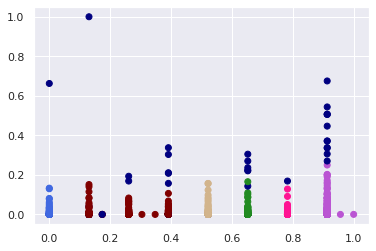

In [121]:
plt.scatter(X[0], X[3], c=vectorizer(clusters))

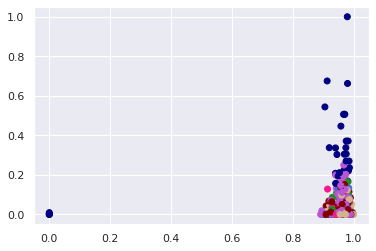

In [122]:
plt.scatter(X[1], X[3], c=vectorizer(clusters))

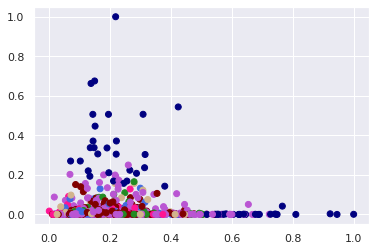

In [123]:
plt.scatter(X[2], X[3], c=vectorizer(clusters))